### Problem Statement

#### To build a model that predicts whether a passeneger on the Titanic is survived or not.

In [1]:
#Required libraries to import dataset
import pandas as pd

In [2]:
#Using pandas to read as dataframe
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# So for any model to develope there are some process so as to get our model optimized
# 1 Frame the problem
# 2 Data Gathering
# 3 Data Preprocessing
# 4 Exloratory Data Analysis
# 5 Feature Engineering/Selection
# 6 Model Training Evaluation and Selection
# 7 Model Deployment
# 8 Testing
# 9 Optimize

In [4]:
#Step 1 and 2 are already done where our problem is to solve whether the passenger is survived or not.
#Proceeding with step 3 i.e data preprocessing

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Removing the columns which are not required
new_df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [8]:
#Doing some analysis so as to understand the data, so importing the libraries used for analysis
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

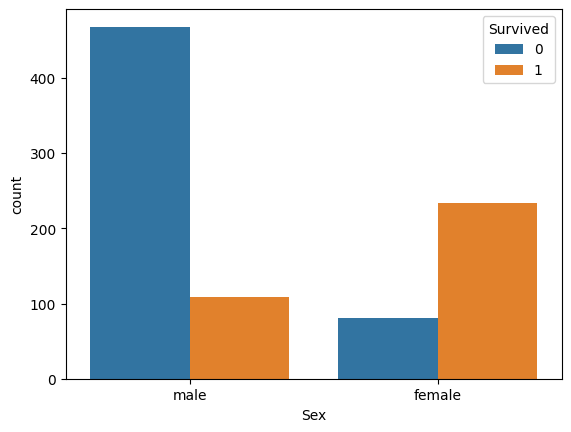

In [9]:
#Analyzing which gender are survived most
sns.countplot(new_df, x = 'Sex', hue='Survived')

#### We seen that most of the females are survived which means the rescue team saved mos of the female passengers

<Axes: xlabel='Pclass', ylabel='count'>

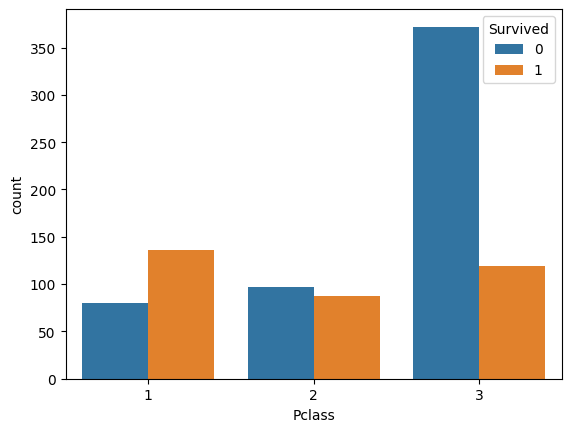

In [10]:
#Analyzing with classes of which they survive
sns.countplot(new_df, x = 'Pclass', hue='Survived')

#### According to graph, we can say that 3rd class deck of ship are not survived so, we can say that probability of surviving of passengers would be mostly from 1st or 2nd class.

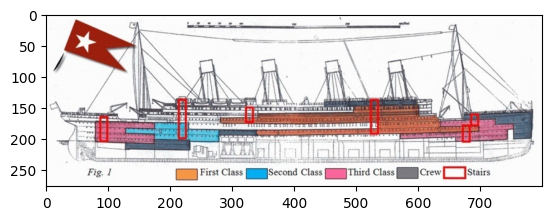

In [11]:
#Figuring the ship structure
import matplotlib.image as mpimg
img = mpimg.imread('./main-qimg-81225718e7c666991808a1f24b79ff5f.jpeg')
imgplot = plt.imshow(img)
plt.show()

#### So I found the structure of image, where it is clearly seen that after crashing the ship brokes into two from middle and the back class are highly affected that is 3rd class.
#### And we can also say that class is having high relation between their survival.

<Axes: xlabel='Embarked', ylabel='count'>

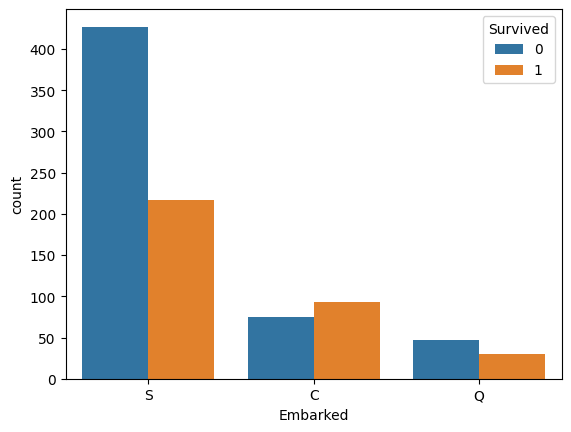

In [12]:
#Analyzing the embarked placed from where they are mounted
sns.countplot(new_df, x = 'Embarked', hue='Survived')

#### We can say that mostly from the place S i.e Southampton where all the passengers are mounted from.

<Axes: xlabel='Embarked', ylabel='count'>

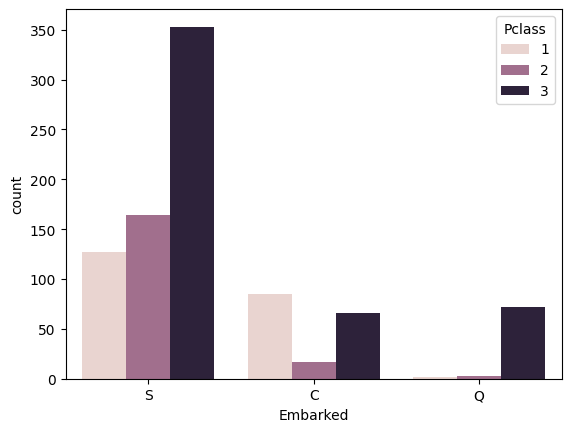

In [13]:
#Analyzing why only Southampton passengers were mostly affected
sns.countplot(new_df, x = 'Embarked',  hue='Pclass')

#### Chances are likely to be mostly Southampton passengers and that too they were in 3rd class.

In [14]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [15]:
#Mainly analyzed everything related to the features now checking missing values
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [16]:
#Checking missing values so that we can handle with it later on
new_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [17]:
#Handling one column i.e Embarked as its very less missing values so dropped it
new_df.dropna(subset = ['Embarked'], inplace=True)

In [18]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [19]:
new_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [20]:
#Now handling age attribute missing value so going with iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor  # You can choose another estimator

In [21]:
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

In [22]:
#Create new column for imputed Age
age_column = new_df[['Age']]

In [23]:
# Fit and transform the data using the imputer
imputed_data = imputer.fit_transform(age_column)

# Create a new DataFrame with the imputed data
df_imputed = pd.DataFrame(imputed_data, columns=['Age'])

In [24]:
#So we get the imputed data
df_imputed

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
884,27.000000
885,19.000000
886,29.642093
887,26.000000


In [25]:
#Replacing with the original data
new_df['Age'] = df_imputed

In [26]:
#Checking is there missing values
new_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         2
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [27]:
#As its very low missing values so just dropping
new_df.dropna(subset=['Age'], inplace = True)

In [28]:
new_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

#### Now missing values are all imputed, so proceeding it with feature construction

In [29]:
#If Sib/Spouse and Parch merges they become a family
new_df['Family'] = new_df['SibSp'] + new_df['Parch']
new_df['Family']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    5
886    0
887    0
888    3
Name: Family, Length: 887, dtype: int64

In [30]:
#If Only one is present then they are alone
new_df['Alone'] = new_df['Family']==0
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family,Alone
0,0,3,male,22.000000,1,0,S,1,False
1,1,1,female,38.000000,1,0,C,1,False
2,1,3,female,26.000000,0,0,S,0,True
3,1,1,female,35.000000,1,0,S,1,False
4,0,3,male,35.000000,0,0,S,0,True
...,...,...,...,...,...,...,...,...,...
884,0,3,male,27.000000,0,0,S,0,True
885,0,3,female,19.000000,0,5,Q,5,False
886,0,2,male,29.642093,0,0,S,0,True
887,1,1,female,26.000000,0,0,S,0,True


In [31]:
#Importing Numeric Python
import numpy as np
#Making Age data type in numeric as its float type
new_df['Age'] = np.round(new_df['Age'])

In [32]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family,Alone
0,0,3,male,22.0,1,0,S,1,False
1,1,1,female,38.0,1,0,C,1,False
2,1,3,female,26.0,0,0,S,0,True
3,1,1,female,35.0,1,0,S,1,False
4,0,3,male,35.0,0,0,S,0,True
...,...,...,...,...,...,...,...,...,...
884,0,3,male,27.0,0,0,S,0,True
885,0,3,female,19.0,0,5,Q,5,False
886,0,2,male,30.0,0,0,S,0,True
887,1,1,female,26.0,0,0,S,0,True


<Axes: >

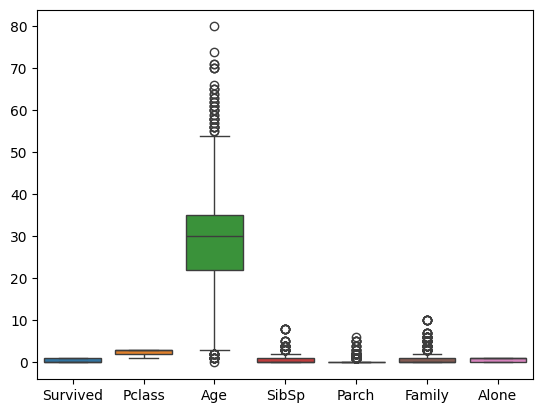

In [33]:
#Detecting Outlier
sns.boxplot(new_df)

In [34]:
q1 = new_df['Age'].quantile(0.25)
q2 = new_df['Age'].quantile(0.75)
iqr = q2 - q1
lb = q1 - 1.5 * iqr
ub = q2 + 1.5 * iqr

In [35]:
#Identify Outlier
outliers = new_df[(new_df['Age'] < lb) | (new_df['Age'] > ub)]

In [36]:
#Transforming Outliers
new_df = new_df[(new_df['Age'] >= lb) & (new_df['Age'] <= ub)]

In [37]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family,Alone
0,0,3,male,22.0,1,0,S,1,False
1,1,1,female,38.0,1,0,C,1,False
2,1,3,female,26.0,0,0,S,0,True
3,1,1,female,35.0,1,0,S,1,False
4,0,3,male,35.0,0,0,S,0,True
...,...,...,...,...,...,...,...,...,...
884,0,3,male,27.0,0,0,S,0,True
885,0,3,female,19.0,0,5,Q,5,False
886,0,2,male,30.0,0,0,S,0,True
887,1,1,female,26.0,0,0,S,0,True


<Axes: xlabel='Age', ylabel='Density'>

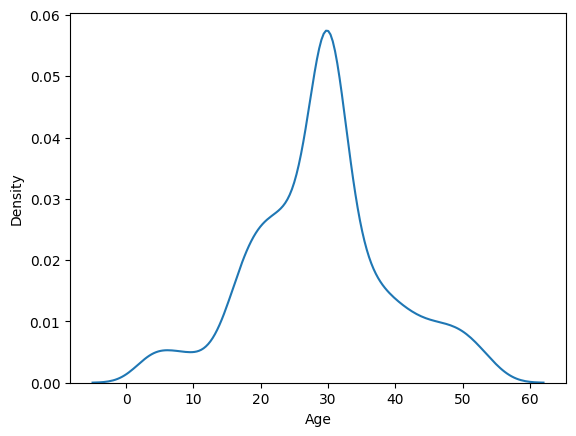

In [38]:
#Checking the distribution after removing Outliers does it changes or not
sns.kdeplot(new_df['Age'])

#### Outliers are also detected and transform and also got in a normal distribution

In [39]:
#Importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Define the mapping dictionary
sex = {'female': 0, 'male': 1}

# Map the 'Sex' column using the defined mapping dictionary
new_df['Sex'] = new_df['Sex'].map(sex)


In [40]:
# Define the mapping dictionary
embarked_levels = {'C': 0, 'Q': 1, 'S':2}

# Map the 'Sex' column using the defined mapping dictionary
new_df['Embarked'] = new_df['Embarked'].map(embarked_levels)


In [41]:
#Our new dataframe
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family,Alone
0,0,3,1,22.0,1,0,2,1,False
1,1,1,0,38.0,1,0,0,1,False
2,1,3,0,26.0,0,0,2,0,True
3,1,1,0,35.0,1,0,2,1,False
4,0,3,1,35.0,0,0,2,0,True
...,...,...,...,...,...,...,...,...,...
884,0,3,1,27.0,0,0,2,0,True
885,0,3,0,19.0,0,5,1,5,False
886,0,2,1,30.0,0,0,2,0,True
887,1,1,0,26.0,0,0,2,0,True


In [42]:
#Now the new df would be after dropping unwanted columns
new_df.drop(['SibSp', 'Parch', 'Sex', 'Alone'], axis = 1)

,Survived,Pclass,Age,Embarked,Family
0,0,3,22.0,2,1
1,1,1,38.0,0,1
2,1,3,26.0,2,0
3,1,1,35.0,2,1
4,0,3,35.0,2,0
...,...,...,...,...,...
884,0,3,27.0,2,0
885,0,3,19.0,1,5
886,0,2,30.0,2,0
887,1,1,26.0,2,0


In [45]:
new_df['Survived'].value_counts()

Survived
0    506
1    317
Name: count, dtype: int64

In [46]:
#Splitting dataset into independent and dependent variables
X = new_df[['Pclass', 'Age', 'Embarked', 'Family', 'Sex']]
y = new_df['Survived']

In [47]:
# Split the dataset into training and testing sets
#Importing libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train

,Pclass,Age,Embarked,Family,Sex
261,3,52.0,2,6,1
765,1,30.0,2,1,0
820,1,27.0,2,2,0
467,1,30.0,2,0,1
327,2,31.0,2,0,0
...,...,...,...,...,...
79,3,22.0,2,0,0
117,2,24.0,2,1,1
295,1,24.0,0,0,1
471,3,33.0,2,0,1


#### Model selection
#### Logistic regression taking into consideration for model training


In [49]:
#Model training and testing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import  cross_val_score
# Model training
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Model evaluation
y_pred = model1.predict(X_test)


In [50]:
model1.predict([[1, 40, 0, 1, 0]])

array([1], dtype=int64)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.793939393939394
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       102
           1       0.75      0.70      0.72        63

    accuracy                           0.79       165
   macro avg       0.78      0.78      0.78       165
weighted avg       0.79      0.79      0.79       165



In [52]:
crd = cross_val_score(model1,X,y,cv = 10)
crd.mean()

0.7935204231560389

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 15],
       [19, 44]], dtype=int64)

#### Decision tree taking into consideration for model training


In [54]:
#Model training and testing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import  cross_val_score
# Model training
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

# Model evaluation
y_pred = model2.predict(X_test)


In [55]:
model2.predict([[1, 40, 0, 1, 0]])

array([1], dtype=int64)

In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       102
           1       0.65      0.63      0.64        63

    accuracy                           0.73       165
   macro avg       0.71      0.71      0.71       165
weighted avg       0.73      0.73      0.73       165



In [57]:
crd = cross_val_score(model2,X,y,cv = 10)
crd.mean()

0.7704378489568029

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[80, 22],
       [23, 40]], dtype=int64)

#### XGBoost taking into consideration for model training

In [59]:
#Model training and testing
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import  cross_val_score
# Model training
model3 = XGBClassifier()
model3.fit(X_train, y_train)

# Model evaluation
y_pred = model3.predict(X_test)


In [60]:
model3.predict([[1, 40, 0, 1, 0]])

array([1])

In [61]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7636363636363637
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       102
           1       0.75      0.57      0.65        63

    accuracy                           0.76       165
   macro avg       0.76      0.73      0.74       165
weighted avg       0.76      0.76      0.76       165



In [62]:
crd = cross_val_score(model3,X,y,cv = 10)
crd.mean()

0.7886423743755511

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 12],
       [27, 36]], dtype=int64)

#### Random forest Tree taking into consideration for model training

In [64]:
#Model training and testing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import  cross_val_score
# Model training
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)

# Model evaluation
y_pred = model4.predict(X_test)


In [65]:
model4.predict([[1, 40, 0, 1, 0]])

array([1], dtype=int64)

In [66]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       102
           1       0.67      0.60      0.63        63

    accuracy                           0.73       165
   macro avg       0.72      0.71      0.71       165
weighted avg       0.73      0.73      0.73       165



In [67]:
crd = cross_val_score(model4,X,y,cv = 10)
crd.mean()

0.7838671760211579

#### So we seen 4 models i.e Logistic Regression, Decision tree, XGBoost, and Random Forest Tree, and we noticed that Logistic Regression works well with accuracy of 79% and cross validation score of 79%.

#### And this we completed our problem statement to build a model that predicts whether a passenger is survived or not on the titanic dataset having parameters like Age, Sex, Embarked, Pclass, Family